**PROBLEM STATEMENT**

- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit.
- The equation is as follows: T(°F) = T(°C) × 9/5 + 32
- For Example, let's convert 0°C celsius temperature to Fahrenheit: (0°C × 9/5) + 32 = 32°F


In [21]:
from google.colab import files
uploaded = files.upload()

Saving original.csv to original (2).csv


**Importing the Library**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['original.csv']))

In [25]:
data.head(10)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [26]:
data.tail()

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [27]:
data.shape

(30, 2)

In [28]:
data.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


**Visualization Dataset**

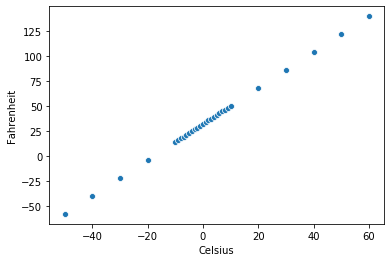

In [30]:
sns.scatterplot(data['Celsius'], data['Fahrenheit'])

**Create Training and testing Dataset**

In [0]:
x_train = data['Celsius']
y_train = data['Fahrenheit']

**Build and train our model**

In [32]:
x_train.shape

(30,)

In [33]:
y_train.shape

(30,)

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [37]:
epoc_hist = model.fit(x_train, y_train, epochs=500)

Train on 30 samples
Epoch 1/500
30/30 [==============================] - 0s 14ms/sample - loss: 5196.0308
Epoch 2/500
30/30 [==============================] - 0s 164us/sample - loss: 3832.3252
Epoch 3/500
30/30 [==============================] - 0s 170us/sample - loss: 2733.0068
Epoch 4/500
30/30 [==============================] - 0s 109us/sample - loss: 1897.8049
Epoch 5/500
30/30 [==============================] - 0s 75us/sample - loss: 1318.6655
Epoch 6/500
30/30 [==============================] - 0s 74us/sample - loss: 976.3494
Epoch 7/500
30/30 [==============================] - 0s 64us/sample - loss: 837.3483
Epoch 8/500
30/30 [==============================] - 0s 108us/sample - loss: 852.9988
Epoch 9/500
30/30 [==============================] - 0s 97us/sample - loss: 963.3082
Epoch 10/500
30/30 [==============================] - 0s 83us/sample - loss: 1106.3132
Epoch 11/500
30/30 [==============================] - 0s 79us/sample - loss: 1229.8756
Epoch 12/500
30/30 [============

**Evaluate the model**

In [38]:
epoc_hist.history.keys()

dict_keys(['loss'])

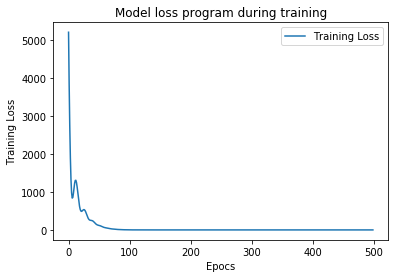

In [39]:
plt.plot(epoc_hist.history['loss'])
plt.title("Model loss program during training")
plt.xlabel("Epocs")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

In [40]:
model.get_weights()

[array([[1.7999998]], dtype=float32), array([32.000023], dtype=float32)]

In [41]:
Temp_C = 0
Temp_F = model.predict([Temp_C])
print("Tempreture in Defg Using Trained ANN", Temp_F)

Tempreture in Defg Using Trained ANN [[32.000023]]


In [42]:
# Lets Conform with the equation.

Temp_F = 9/5 * Temp_C + 32
print("Tempreture in Defg Using Euation", Temp_F)

Tempreture in Defg Using Euation 32.0


In [43]:
Temp_C = 50
Temp_F = model.predict([Temp_C])
print("Tempreture in Defg Using Trained ANN", Temp_F)

Tempreture in Defg Using Trained ANN [[122.000015]]


In [44]:
# Lets Conform with the equation.

Temp_F = 9/5 * Temp_C + 32
print("Tempreture in Defg Using Euation", Temp_F)

Tempreture in Defg Using Euation 122.0


**Great Job Shivan!**